In [12]:
# Import Packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random
import tensorflow as tf
import cv2

In [13]:
# Create Image Object
class Image():
    def __init__(self, path):
        self.path = path
        self.set = path.split('/')[-3]
        self.plant = path.split('/')[-2]
        self.name = path.split('/')[-1]
        self.image = cv2.imread(path)
        self.leaf_bord = None
        self.leaf_phyllotaxie = None
        self.leaf_type = None
        self.leaf_ligneux: bool = None

    def remove_background(self):
        colored_image = cv2.imread(self.path)
        grey_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2GRAY)
        for _ in range(3):
            grey_image = cv2.GaussianBlur(grey_image, (51, 51), 0)
        _, thresh = cv2.threshold(grey_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Apply mask to colored_image
        colored_image = cv2.bitwise_or(colored_image, colored_image, mask=cv2.bitwise_not(thresh))
        self.image = colored_image

    # Resize all images to the same width and height using padding to keep the aspect ratio, cropping if needed
    def resize(self, width, height):
        self.image = cv2.resize(self.image, (width, height), interpolation=cv2.INTER_AREA)

In [14]:
# Charger les données
images = []

for set in os.listdir('dataset/'):
    for plant in os.listdir('dataset/'+set+'/'):
        for image in os.listdir('dataset/'+set+'/'+plant+'/'):
            print('dataset/'+set+'/'+plant+'/'+image)
            img = Image('dataset/'+set+'/'+plant+'/'+image)
            # img.remove_background()
            img.resize(300, 500)
            images.append(img)        

dataset/Test/desmodium/desmodium073.jpg
dataset/Test/desmodium/desmodium072.jpg
dataset/Test/desmodium/desmodium071.jpg
dataset/Test/desmodium/desmodium075.jpg
dataset/Test/desmodium/desmodium074.jpg
dataset/Test/desmodium/desmodium076.jpg
dataset/Test/desmodium/desmodium077.jpg
dataset/Test/desmodium/desmodium079.jpg
dataset/Test/desmodium/desmodium078.jpg
dataset/Test/desmodium/desmodium080.jpg
dataset/Test/laurus/laurus080.jpg
dataset/Test/laurus/laurus078.jpg
dataset/Test/laurus/laurus079.jpg
dataset/Test/laurus/laurus074.jpg
dataset/Test/laurus/laurus075.jpg
dataset/Test/laurus/laurus077.jpg
dataset/Test/laurus/laurus076.jpg
dataset/Test/laurus/laurus072.jpg
dataset/Test/laurus/laurus073.jpg
dataset/Test/laurus/laurus071.jpg
dataset/Test/monimiaceae/monimiaceae080.jpg
dataset/Test/monimiaceae/monimiaceae078.jpg
dataset/Test/monimiaceae/monimiaceae079.jpg
dataset/Test/monimiaceae/monimiaceae077.jpg
dataset/Test/monimiaceae/monimiaceae076.jpg
dataset/Test/monimiaceae/monimiaceae074.

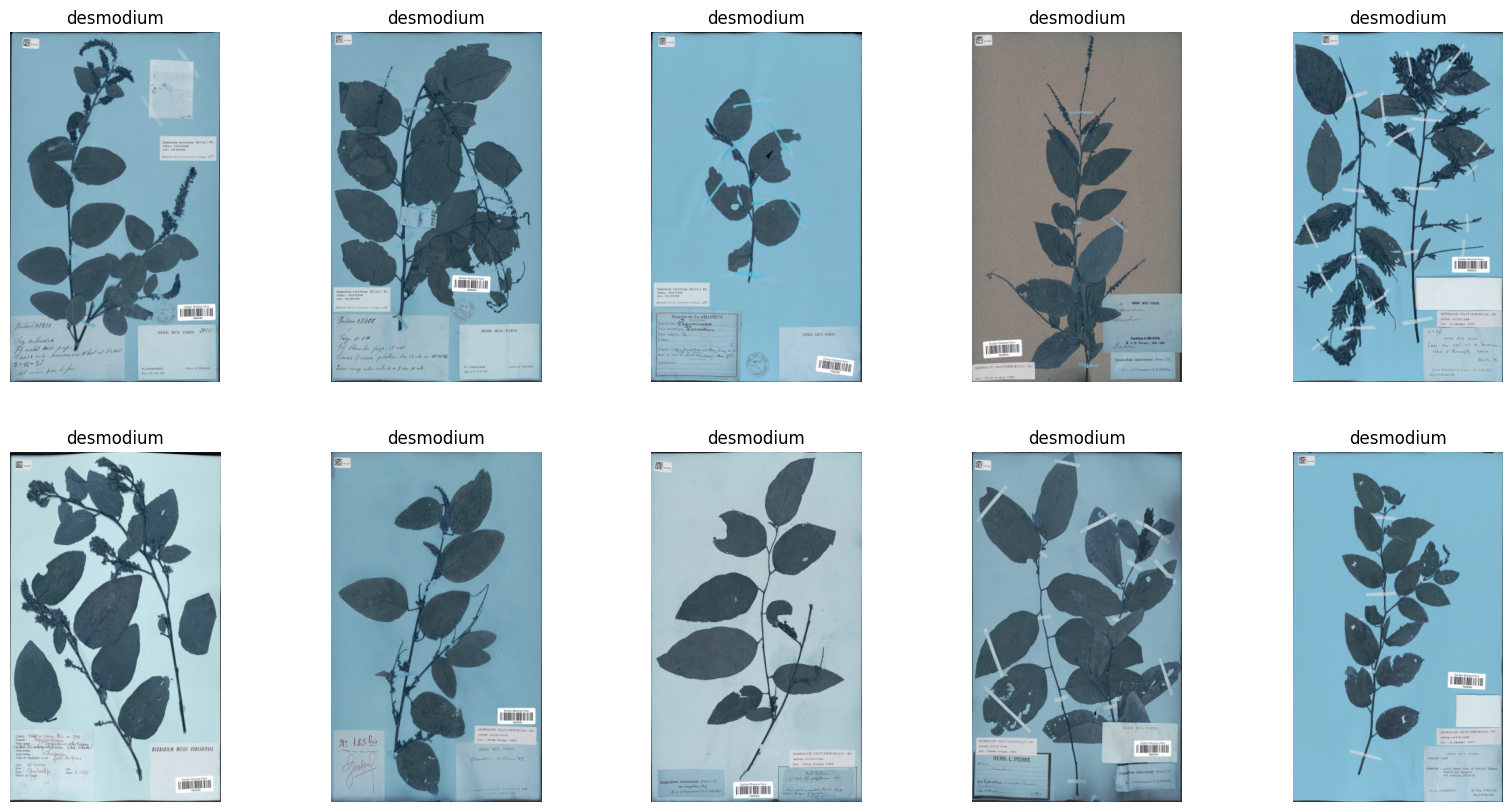

In [15]:
# Plot 10 images
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    ax[i//5, i%5].imshow(images[i].image)
    ax[i//5, i%5].set_title(images[i].plant)
    ax[i//5, i%5].axis('off')
plt.show()

In [18]:
import json
leaves = json.load(open('config.json'))

In [19]:
# map config file to images
for image in images:
    image.leaf_bord = leaves[image.plant]['leaf_bord']
    image.leaf_phyllotaxie = leaves[image.plant]['leaf_phyllotaxie']
    image.leaf_type = leaves[image.plant]['leaf_type']
    image.leaf_ligneux = leaves[image.plant]['leaf_ligneux']

# Create Dataframe
df = pd.DataFrame([vars(image) for image in images])
df


KeyError: 'leaf_bord'

In [7]:

for image in images:
    if image.plant in ["convolvulaceae"]:
        image.leaf_bord = "lisse"
        image.leaf_phyllotaxie = "alterné"
        image.leaf_type = "simple"
        image.leaf_ligneux = False
    elif image.plant in ["monimiaceae", "eugenia", "laurus"]:
        image.leaf_bord = "lisse"
        image.leaf_phyllotaxie = "opposé"
        image.leaf_type = "simple"
        image.leaf_ligneux = True
    elif image.plant in ["amborella", "litsea", "magnolia"]:
        image.leaf_bord = "lisse"
        image.leaf_phyllotaxie = "alterné"
        image.leaf_type = "simple"
        image.leaf_ligneux = True
    elif image.plant == "desmodium":
        image.leaf_bord = "lisse"
        image.leaf_phyllotaxie = "alterné"
        image.leaf_type = "composée"
        image.leaf_ligneux = False
    elif image.plant in ["castarea", "ulmus"]:
        image.leaf_bord = "denté"
        image.leaf_phyllotaxie = "alterné"
        image.leaf_type = "simple"
        image.leaf_ligneux = True
    elif image.plant == "rubus":
        image.leaf_bord = "denté"
        image.leaf_phyllotaxie = "alterné"
        image.leaf_type = "composée"
        image.leaf_ligneux = True

# Create Dataframe
df = pd.DataFrame(
    columns=[
        "path",
        "set",
        "plant",
        "name",
        "leaf_bord",
        "leaf_phyllotaxie",
        "leaf_type",
        "leaf_ligneux",
    ]
)
for image in images:
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                {
                    "path": [image.path],
                    "set": [image.set],
                    "plant": [image.plant],
                    "name": [image.name],
                    "leaf_bord": [image.leaf_bord],
                    "leaf_phyllotaxie": [image.leaf_phyllotaxie],
                    "leaf_type": [image.leaf_type],
                    "leaf_ligneux": [image.leaf_ligneux],
                }
            ),
        ],
        ignore_index=True,
    )
df


/var/folders/jn/n2d5t8rx2_73c9nhtxv3dkw00000gp/T/ipykernel_99675/2795584054.py:47: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat(


,path,set,plant,name,leaf_bord,leaf_phyllotaxie,leaf_type,leaf_ligneux
0,dataset/Test/desmodium/desmodium073.jpg,Test,desmodium,desmodium073.jpg,lisse,alterné,composée,False
1,dataset/Test/desmodium/desmodium072.jpg,Test,desmodium,desmodium072.jpg,lisse,alterné,composée,False
2,dataset/Test/desmodium/desmodium071.jpg,Test,desmodium,desmodium071.jpg,lisse,alterné,composée,False
3,dataset/Test/desmodium/desmodium075.jpg,Test,desmodium,desmodium075.jpg,lisse,alterné,composée,False
4,dataset/Test/desmodium/desmodium074.jpg,Test,desmodium,desmodium074.jpg,lisse,alterné,composée,False
...,...,...,...,...,...,...,...,...
325,dataset/Train/magnolia/magnolia088.jpg,Train,magnolia,magnolia088.jpg,lisse,alterné,simple,True
326,dataset/Train/magnolia/magnolia089.jpg,Train,magnolia,magnolia089.jpg,lisse,alterné,simple,True
327,dataset/Train/magnolia/magnolia100.jpg,Train,magnolia,magnolia100.jpg,lisse,alterné,simple,True
328,dataset/Train/magnolia/magnolia099.jpg,Train,magnolia,magnolia099.jpg,lisse,alterné,simple,True


In [24]:
# create labels from plant names
labels = []
for image in images:
    labels.append(image.plant)

# create one hot encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoded = to_categorical(integer_encoded)
onehot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
!mkdir preview

mkdir: preview: File exists


In [28]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# generate augmented images
augmented_images = []
for image in images:
    img = image.image
    img = img.reshape((1,) + img.shape)
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir='preview', save_prefix='plant', save_format='jpeg'):
        i += 1
        if i > 2:
            break

In [29]:
# count newly created images
print(len(os.listdir('preview/')))

4966


In [ ]:
# Create Train and Test Data
train_df = df[df['set'] == 'Train']
test_df = df[df['set'] == 'Test']

In [ ]:
# Create X and Y 
X_train = np.asarray(train_df['image'].tolist())
X_test = np.asarray(test_df['image'].tolist())

y_train = np.asarray(train_df['plant'].tolist())
y_test = np.asarray(test_df['plant'].tolist())